You can evaluate different sets of identified negative samples using the ``dPULearn().eval()`` method. Load first one of our example datasets with its respective features:

In [1]:
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False
# Dataset with positive (γ-secretase substrates)
# and unlabeled data (proteins with unknown substrate status)
df_seq = aa.load_dataset(name="DOM_GSEC_PU")
labels = df_seq["label"].to_numpy()
n_pos = sum([x == 1 for x in labels])
df_feat = aa.load_features(name="DOM_GSEC")
aa.display_df(df_seq)

,entry,sequence,label,tmd_start,tmd_stop,jmd_n,tmd,jmd_c
1,P05067,MLPGLALLLLAAWTA...GYENPTYKFFEQMQN,1,701,723,FAEDVGSNKG,AIIGLMVGGVVIATVIVITLVML,KKKQYTSIHH
2,P14925,MAGRARSGLLLLLLG...EEEYSAPLPKPAPSS,1,868,890,KLSTEPGSGV,SVVLITTLLVIPVLVLLAIVMFI,RWKKSRAFGD
3,P70180,MRSLLLFTFSACVLL...RELREDSIRSHFSVA,1,477,499,PCKSSGGLEE,SAVTGIVVGALLGAGLLMAFYFF,RKKYRITIER
4,Q03157,MGPTSPAARGQGRRW...HGYENPTYRFLEERP,1,585,607,APSGTGVSRE,ALSGLLIMGAGGGSLIVLSLLLL,RKKKPYGTIS
5,Q06481,MAATGTAAAAATGRL...GYENPTYKYLEQMQI,1,694,716,LREDFSLSSS,ALIGLLVIAVAIATVIVISLVML,RKRQYGTISH
6,P35613,MAAALFVLLGFALLG...HQNDKGKNVRQRNSS,1,323,345,IITLRVRSHL,AALWPFLGIVAEVLVLVTIIFIY,EKRRKPEDVL
7,P35070,MDRAARCSGASSLPL...DITPINEDIEETNIA,1,119,141,LFYLRGDRGQ,ILVICLIAVMVVFIILVIGVCTC,CHPLRKRRKR
8,P09803,MGARCRSFSALLLLL...RFKKLADMYGGGEDD,1,711,733,GIVAAGLQVP,AILGILGGILALLILILLLLLFL,RRRTVVKEPL
9,P19022,MCRIAGALRTLLPLL...PRFKKLADMYGGGDD,1,724,746,RIVGAGLGTG,AIIAILLCIIILLILVLMFVVWM,KRRDKERQAK
10,P16070,MDKFWWHAAWGLCLV...DETRNLQNVDMKIGV,1,650,672,GPIRTPQIPE,WLIILASLLALALILAVCIAVNS,RRRCGQKKKL


And create their feature matrix using the ``SequenceFeatuer`` class:

In [2]:
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
X = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts)

Using list comprehension, labels for all three ``Distance-based identification`` approaches can be retrieved using the ``dPULearn().fit()`` method with different ``metric`` parameters:

In [3]:
dpul = aa.dPULearn()
# List with valid distance measures 
list_metrics = ["manhattan", "euclidean", "cosine"]
list_labels = [dpul.fit(X=X, labels=labels, metric=metric, n_unl_to_neg=n_pos).labels_ for metric in  list_metrics]

For the ``PCA-based identification``, use the ``n_components`` parameter:

In [4]:
# List with percentage of total variance to be explaiend [0-1]
list_pca_var = [0.6, 0.7, 0.8, 0.9, 0.95]
list_labels.extend([dpul.fit(X=X, labels=labels, n_components=i, n_unl_to_neg=n_pos).labels_ for i in list_pca_var])

Now, the ``dPULearn().eval()`` and ``dPULearnPlot().eval()`` methods can be used:

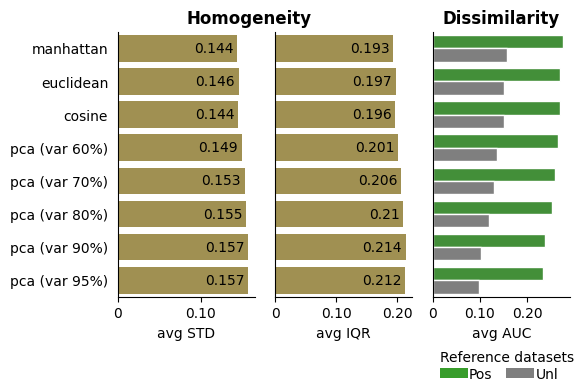

In [5]:
names = list_metrics + [f"pca (var {int(x*100)}%)" for x in list_pca_var]
df_eval = dpul.eval(X=X, list_labels=list_labels, names_datasets=names)
dpul_plot = aa.dPULearnPlot()
dpul_plot.eval(df_eval=df_eval)
plt.tight_layout()
plt.show()

Extend the analysis by using a dataset of ground-truth negatives: 

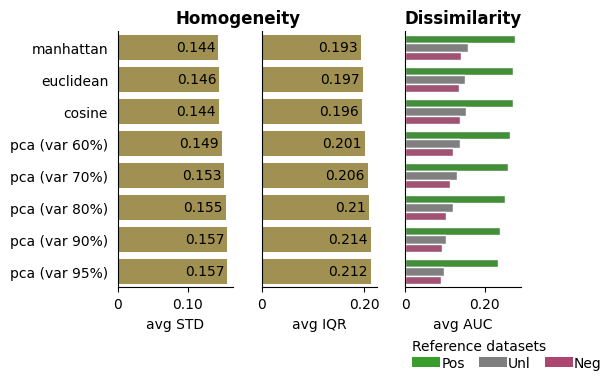

In [6]:
_df_seq = aa.load_dataset(name="DOM_GSEC")
# First 14 entries are ground-truth non-substrates
df_neg = _df_seq[_df_seq["label"] == 0].head(14)
df_parts_neg = sf.get_df_parts(df_seq=df_neg)
X_neg = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts_neg)
# Perform evaluation and visualization
df_eval = dpul.eval(X=X, list_labels=list_labels, names_datasets=names, X_neg=X_neg)
dpul_plot.eval(df_eval=df_eval)
plt.show()

You can effectively utilize the Kullback-Leibler Divergence (KLD) as a complementary measure alongside the adjusted area under the curve (AUC) to evaluate the dissimilarity between sets of identified negatives and reference datasets. These reference datasets include positive samples ('Pos'), unlabeled samples ('Unl'), and, when available, ground-truth negative samples ('Neg').

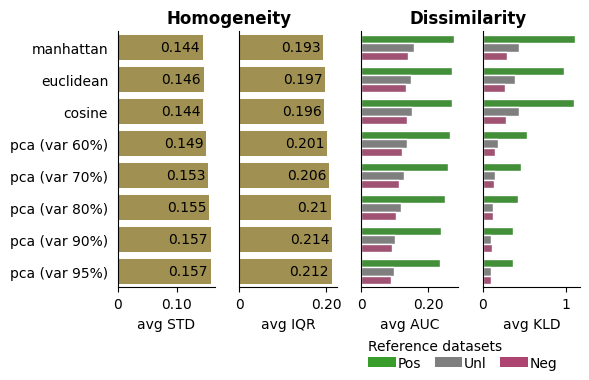

In [7]:
df_eval = dpul.eval(X=X, list_labels=list_labels, names_datasets=names, X_neg=X_neg, comp_kld=True)
dpul_plot.eval(df_eval=df_eval)
plt.show()

The legend can be turned-of by ``legend=False`` or shifted along the y-axis using ``legend_y``, handy if the ``figsize`` is changed:

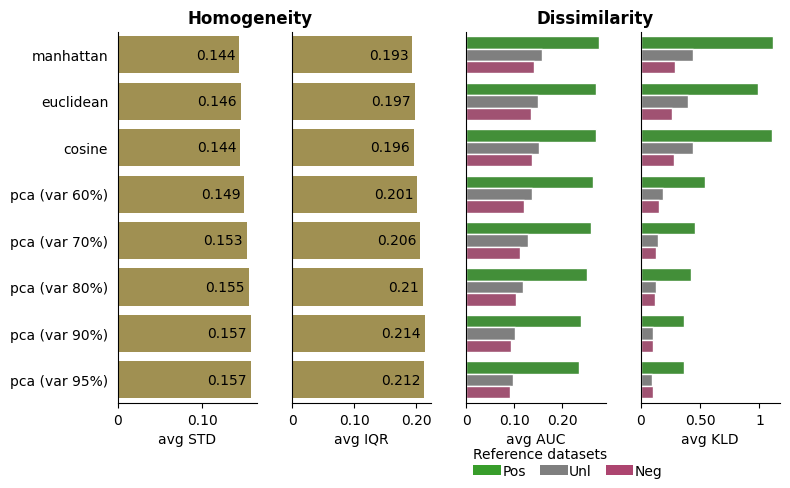

In [8]:
dpul_plot.eval(df_eval=df_eval, figsize=(8, 5), legend_y=-0.1)
plt.show()

You can customize the list of used ``colors``: 

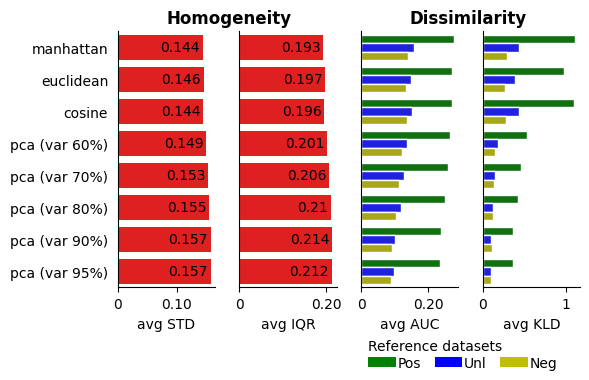

In [9]:
dpul_plot.eval(df_eval=df_eval, colors=["r", "g", "b", "y"])
plt.show()

Customize the x-limits of each subplot using the ``dict_xlims`` parameter:

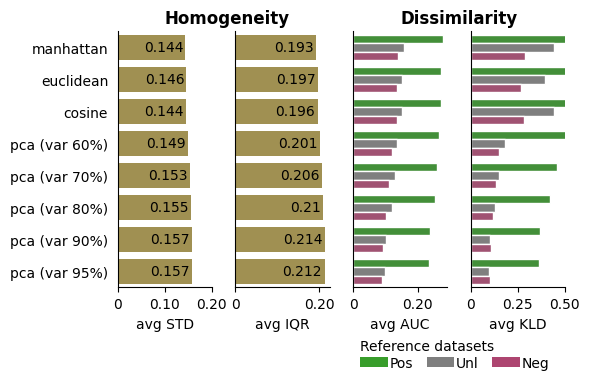

In [10]:
dict_xlims = {0: (0, 0.2), 3: (0, 0.5)} # Adjust first and fourth subplot
dpul_plot.eval(df_eval=df_eval, dict_xlims=dict_xlims)
plt.show()